In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('customer_segmentation_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Handle missing values (if any)
data = data.dropna()  # Drop rows with missing values, or alternatively use imputation

# Feature selection (dropping 'id' as it's not useful for clustering)
data = data.drop(['id'], axis=1)

# Encoding categorical features: 'gender' and 'preferred_category'
# Assuming 'gender' and 'preferred_category' are categorical
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['preferred_category'] = label_encoder.fit_transform(data['preferred_category'])

# Data Standardization (Scaling the continuous features)
continuous_features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
scaled_data = data[continuous_features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

# Check the transformed data
print(scaled_data[:5])  # Display the first 5 rows of the scaled data


   id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08  
[[-0.38464377  0.31686767  1.35846776 -0.86501013 -0.18234781 -1.28154045]
 [-1.51536211 -0.28201608  0.32186512 -1.2153585   1.08200524 -1.52376266]
 [ 1.07863878  1.11277804 -0.71473752 -1.2153585   0.09861954 -0.23000511]


C:\Users\deekc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\deekc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\deekc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\deekc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Window

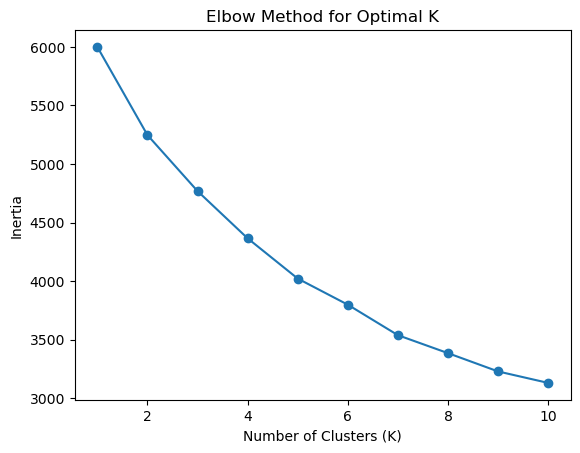

C:\Users\deekc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


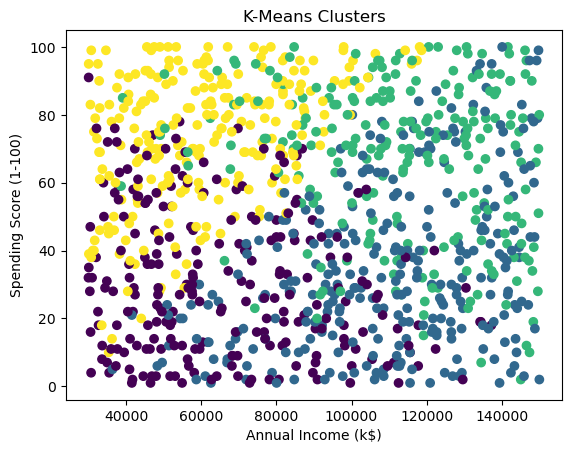

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means with a range of cluster sizes (1 to 10 clusters)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to determine the optimal number of clusters (K)
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# From the elbow plot, assume K=4 is optimal
kmeans = KMeans(n_clusters=4, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.scatter(data['income'], data['spending_score'], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


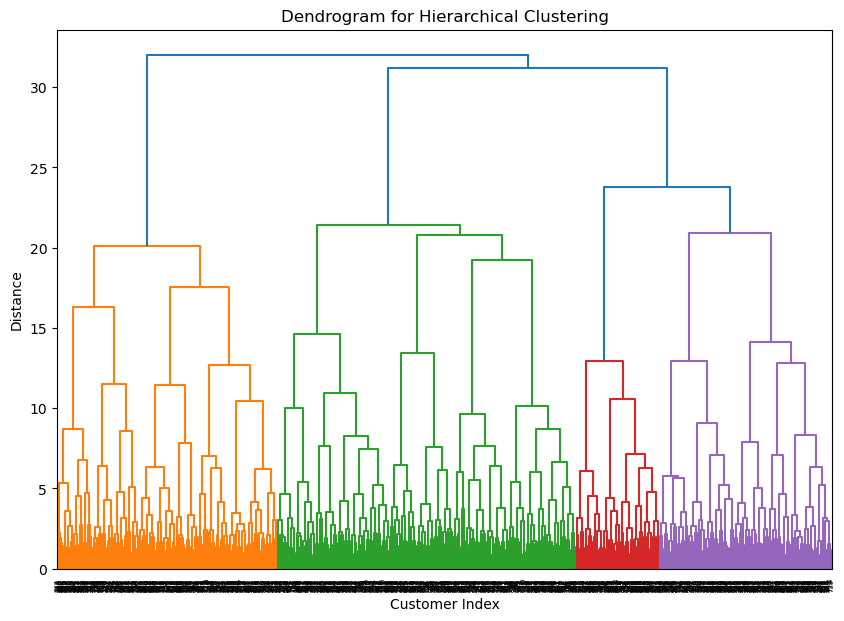

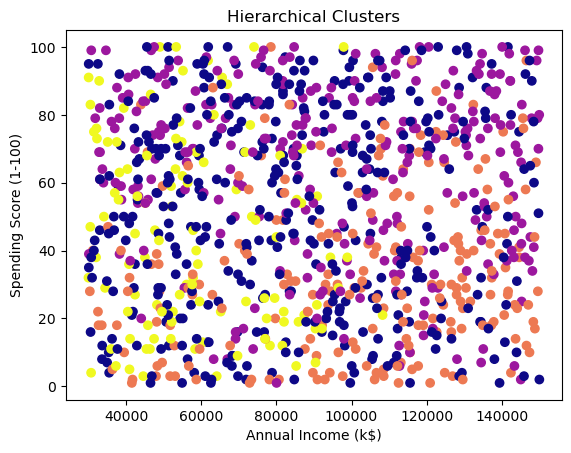

In [9]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical/agglomerative clustering
linked = linkage(scaled_data, method='ward')

# Create a dendrogram to visualize the hierarchical structure
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form 4 clusters
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

# Visualize the hierarchical clustering results
plt.scatter(data['income'], data['spending_score'], c=data['Hierarchical_Cluster'], cmap='plasma')
plt.title('Hierarchical Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


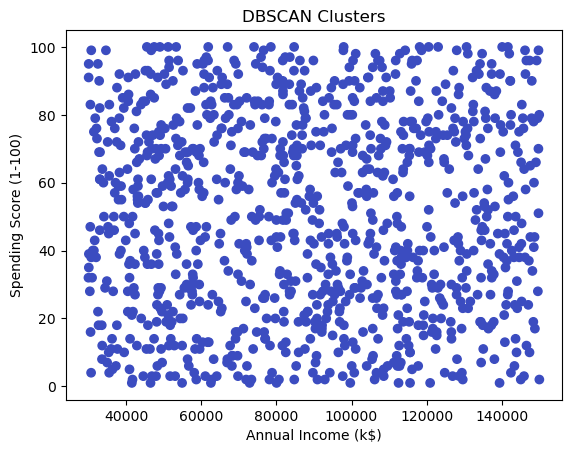

In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with epsilon=0.5 and min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Visualize the DBSCAN clusters
plt.scatter(data['income'], data['spending_score'], c=data['DBSCAN_Cluster'], cmap='coolwarm')
plt.title('DBSCAN Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [13]:
from sklearn.cluster import DBSCAN

# Try different values for eps and min_samples
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Adjust eps to a larger value
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

# Check the number of clusters and noise points
num_clusters = len(np.unique(data['DBSCAN_Cluster']))
num_noise_points = np.sum(data['DBSCAN_Cluster'] == -1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of noise points: {num_noise_points}")

# If there are more than one cluster, compute the silhouette score
if num_clusters > 1:
    dbscan_labels = data['DBSCAN_Cluster']
    dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]  # Remove noise points
    dbscan_silhouette = silhouette_score(scaled_data[dbscan_labels != -1], dbscan_labels_filtered)
    print('Silhouette Score (DBSCAN):', dbscan_silhouette)
else:
    print('Silhouette Score (DBSCAN) cannot be computed: Only one cluster found or all points are noise.')


Number of clusters: 3
Number of noise points: 990
Silhouette Score (DBSCAN): 0.7819470862062863


C:\Users\deekc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


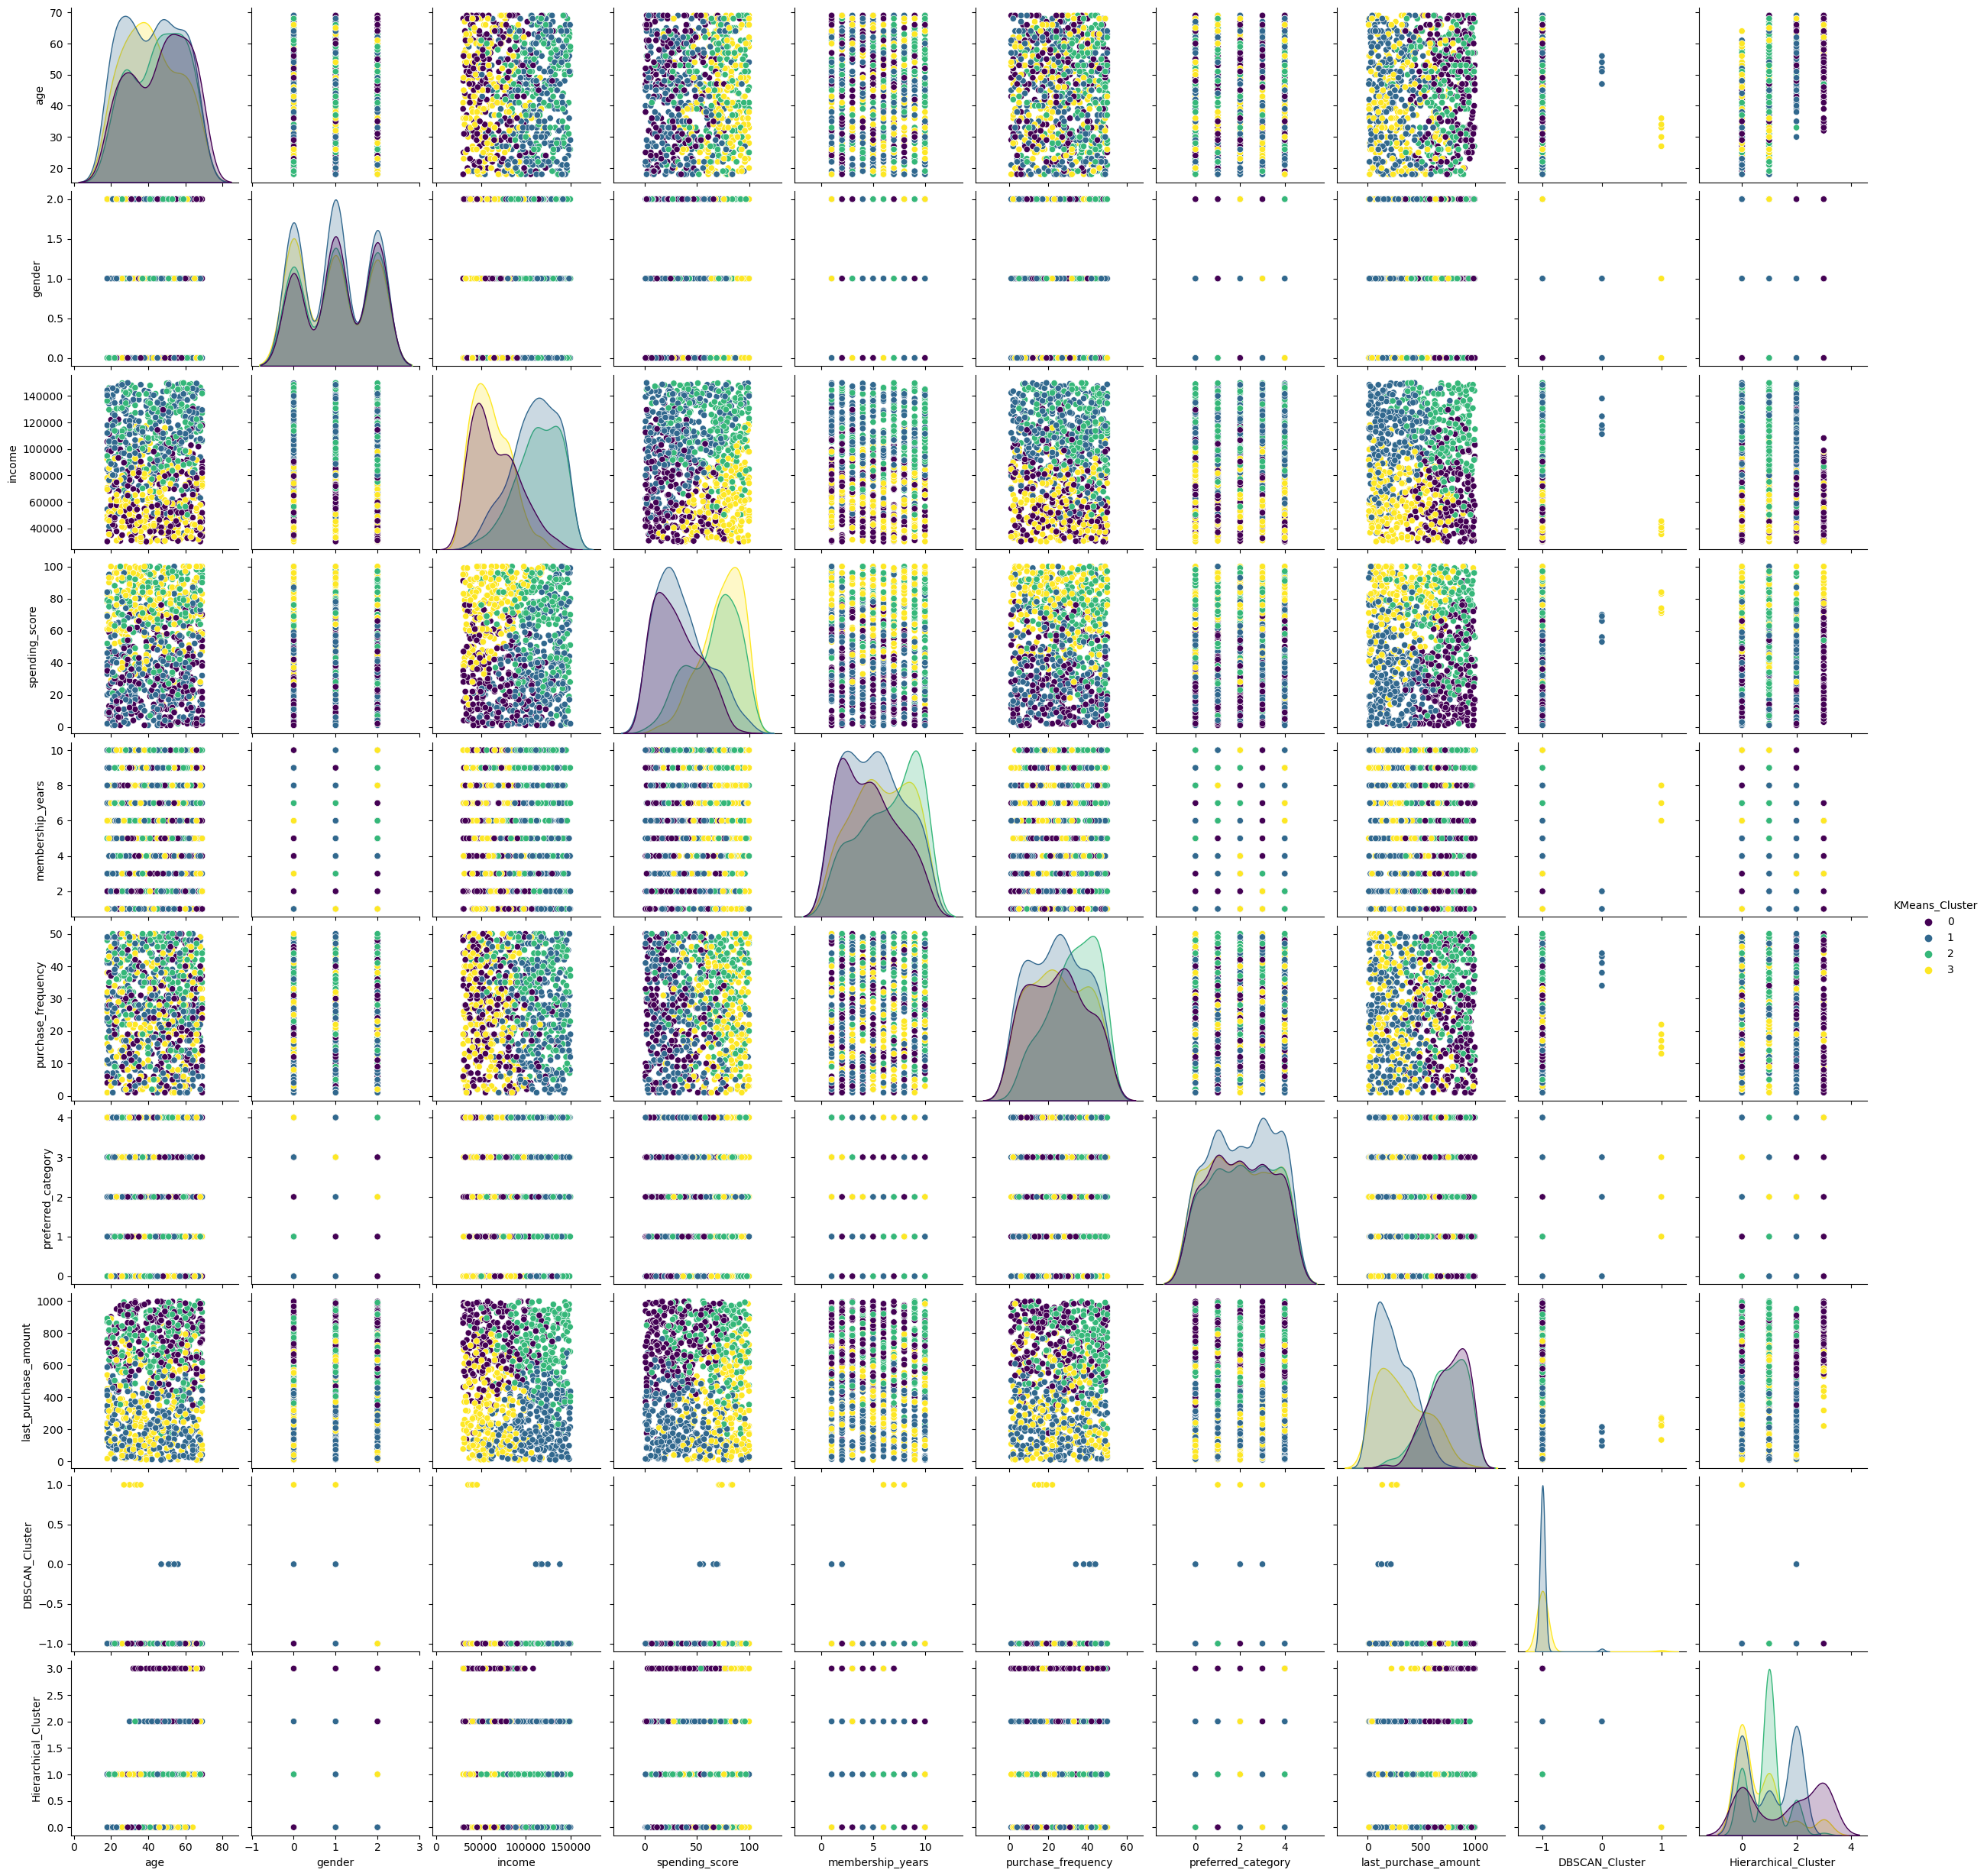

C:\Users\deekc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


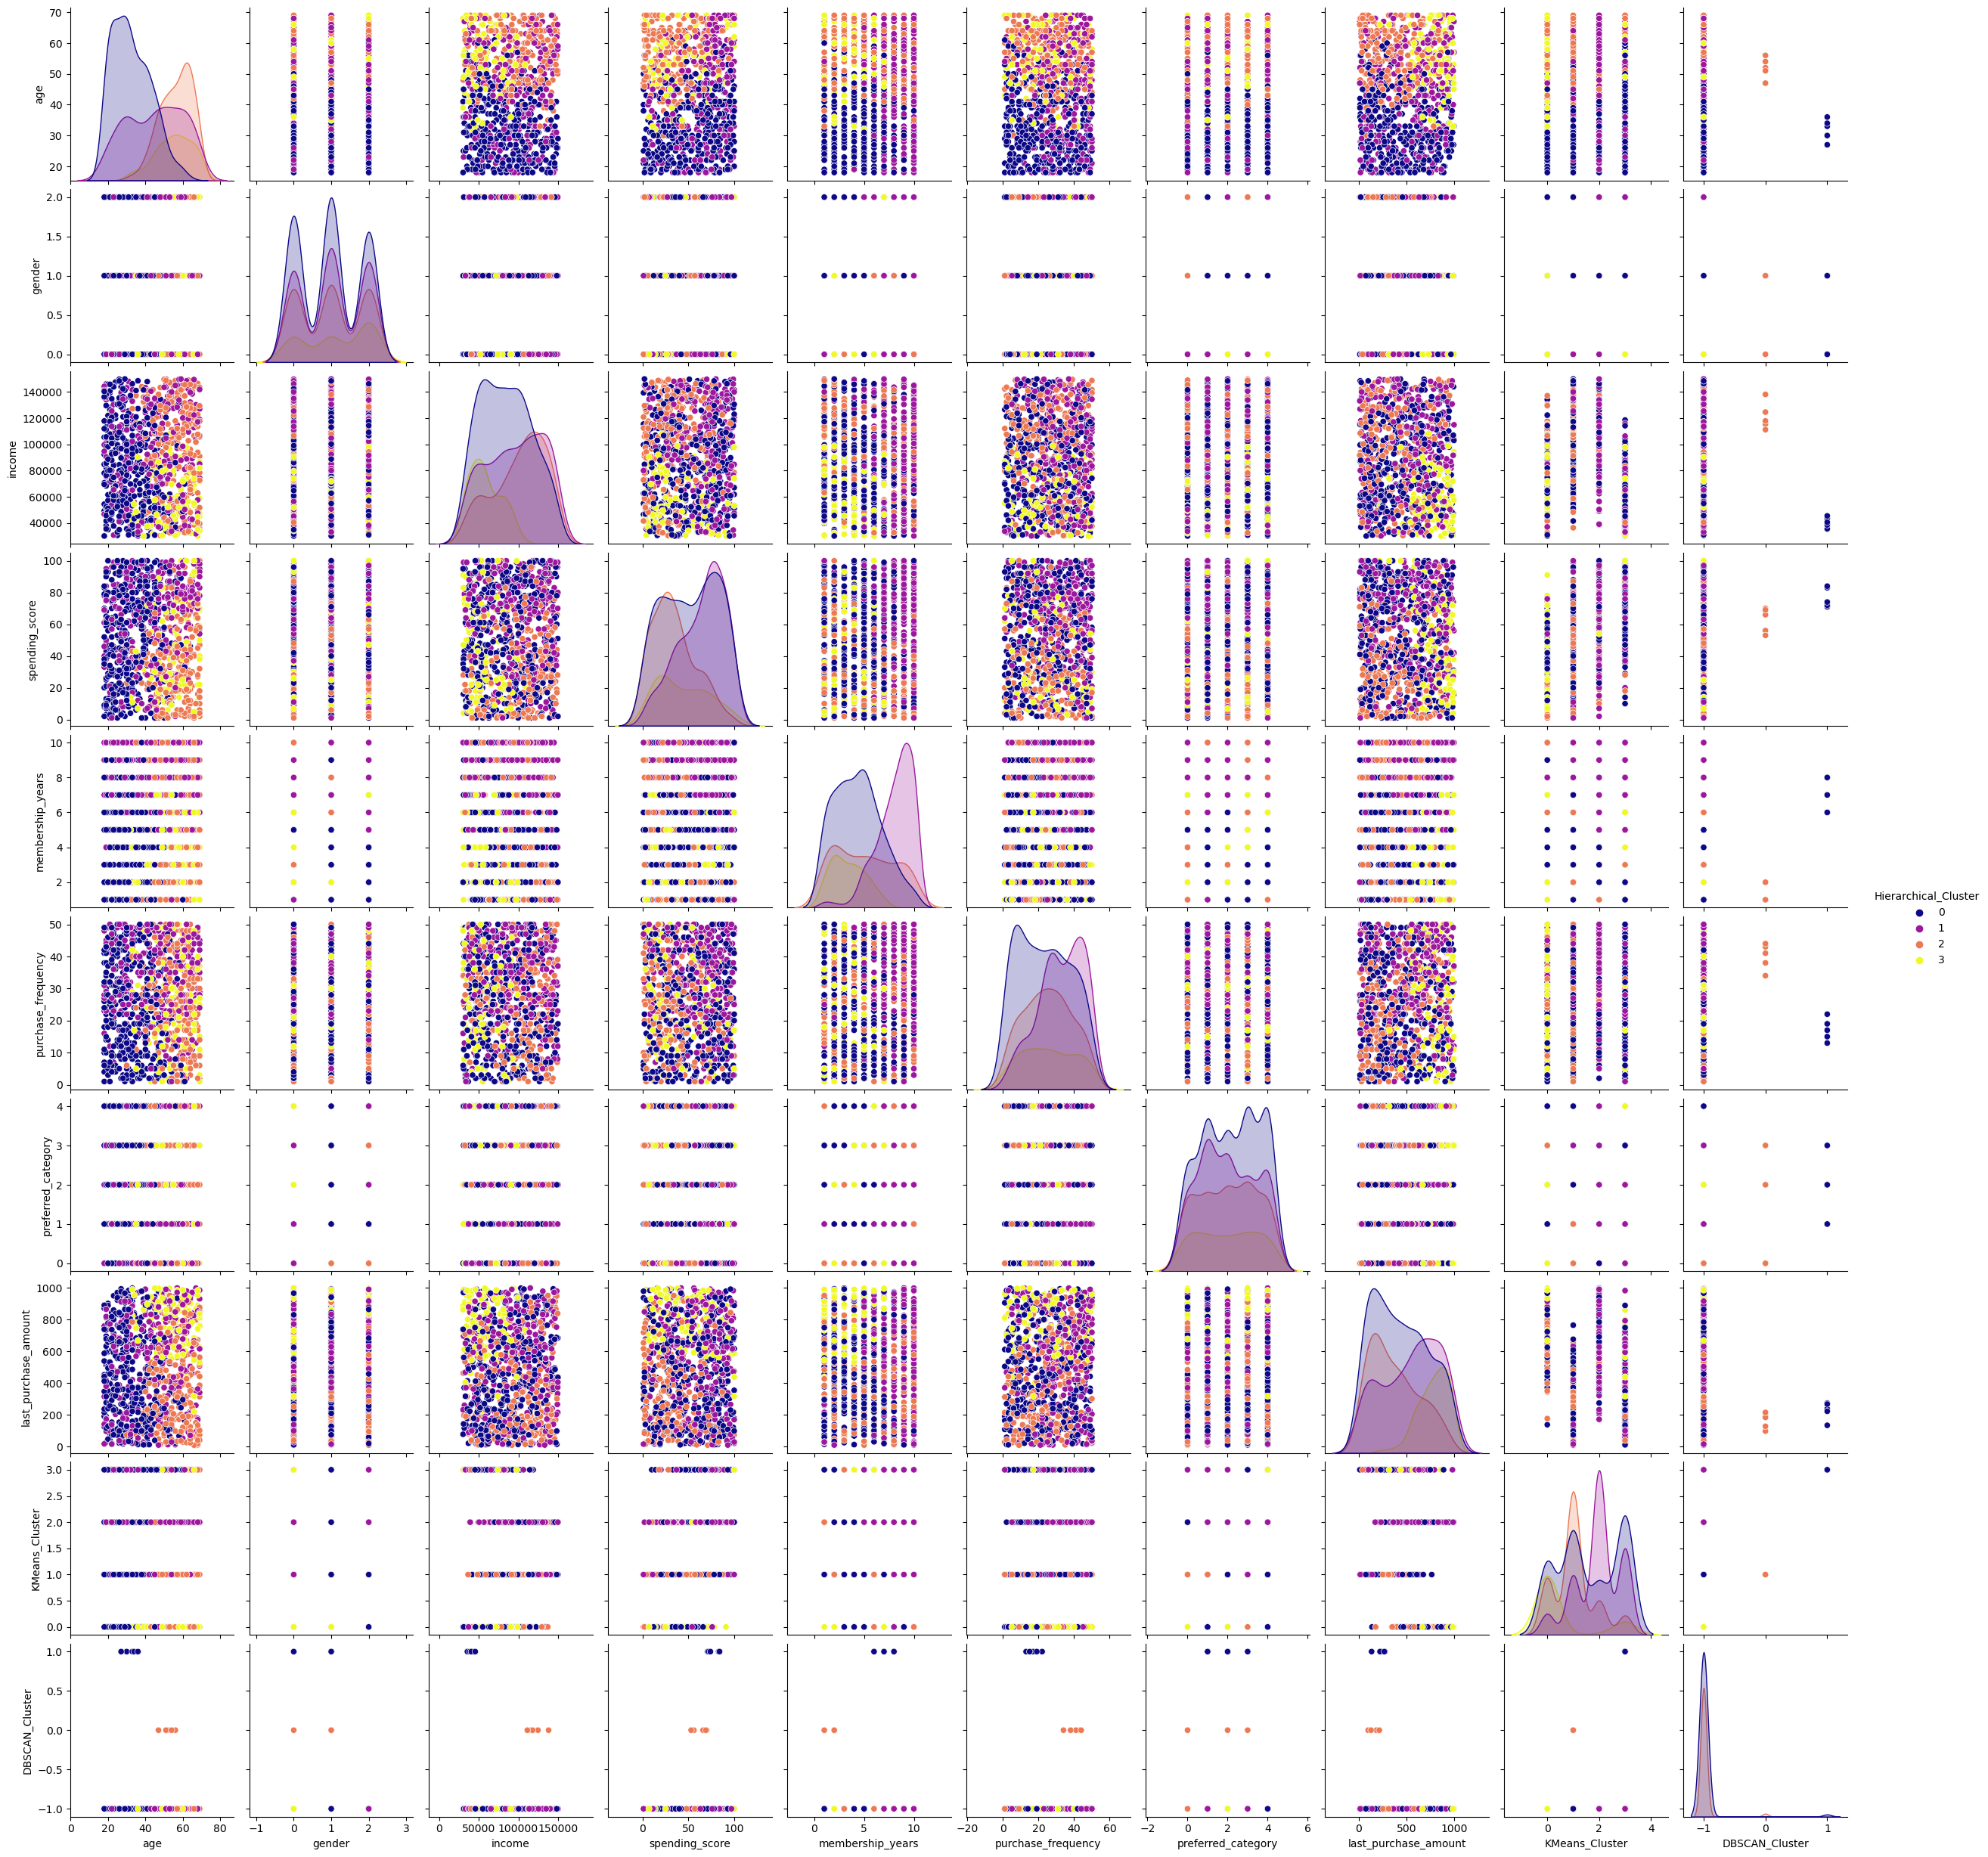

C:\Users\deekc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


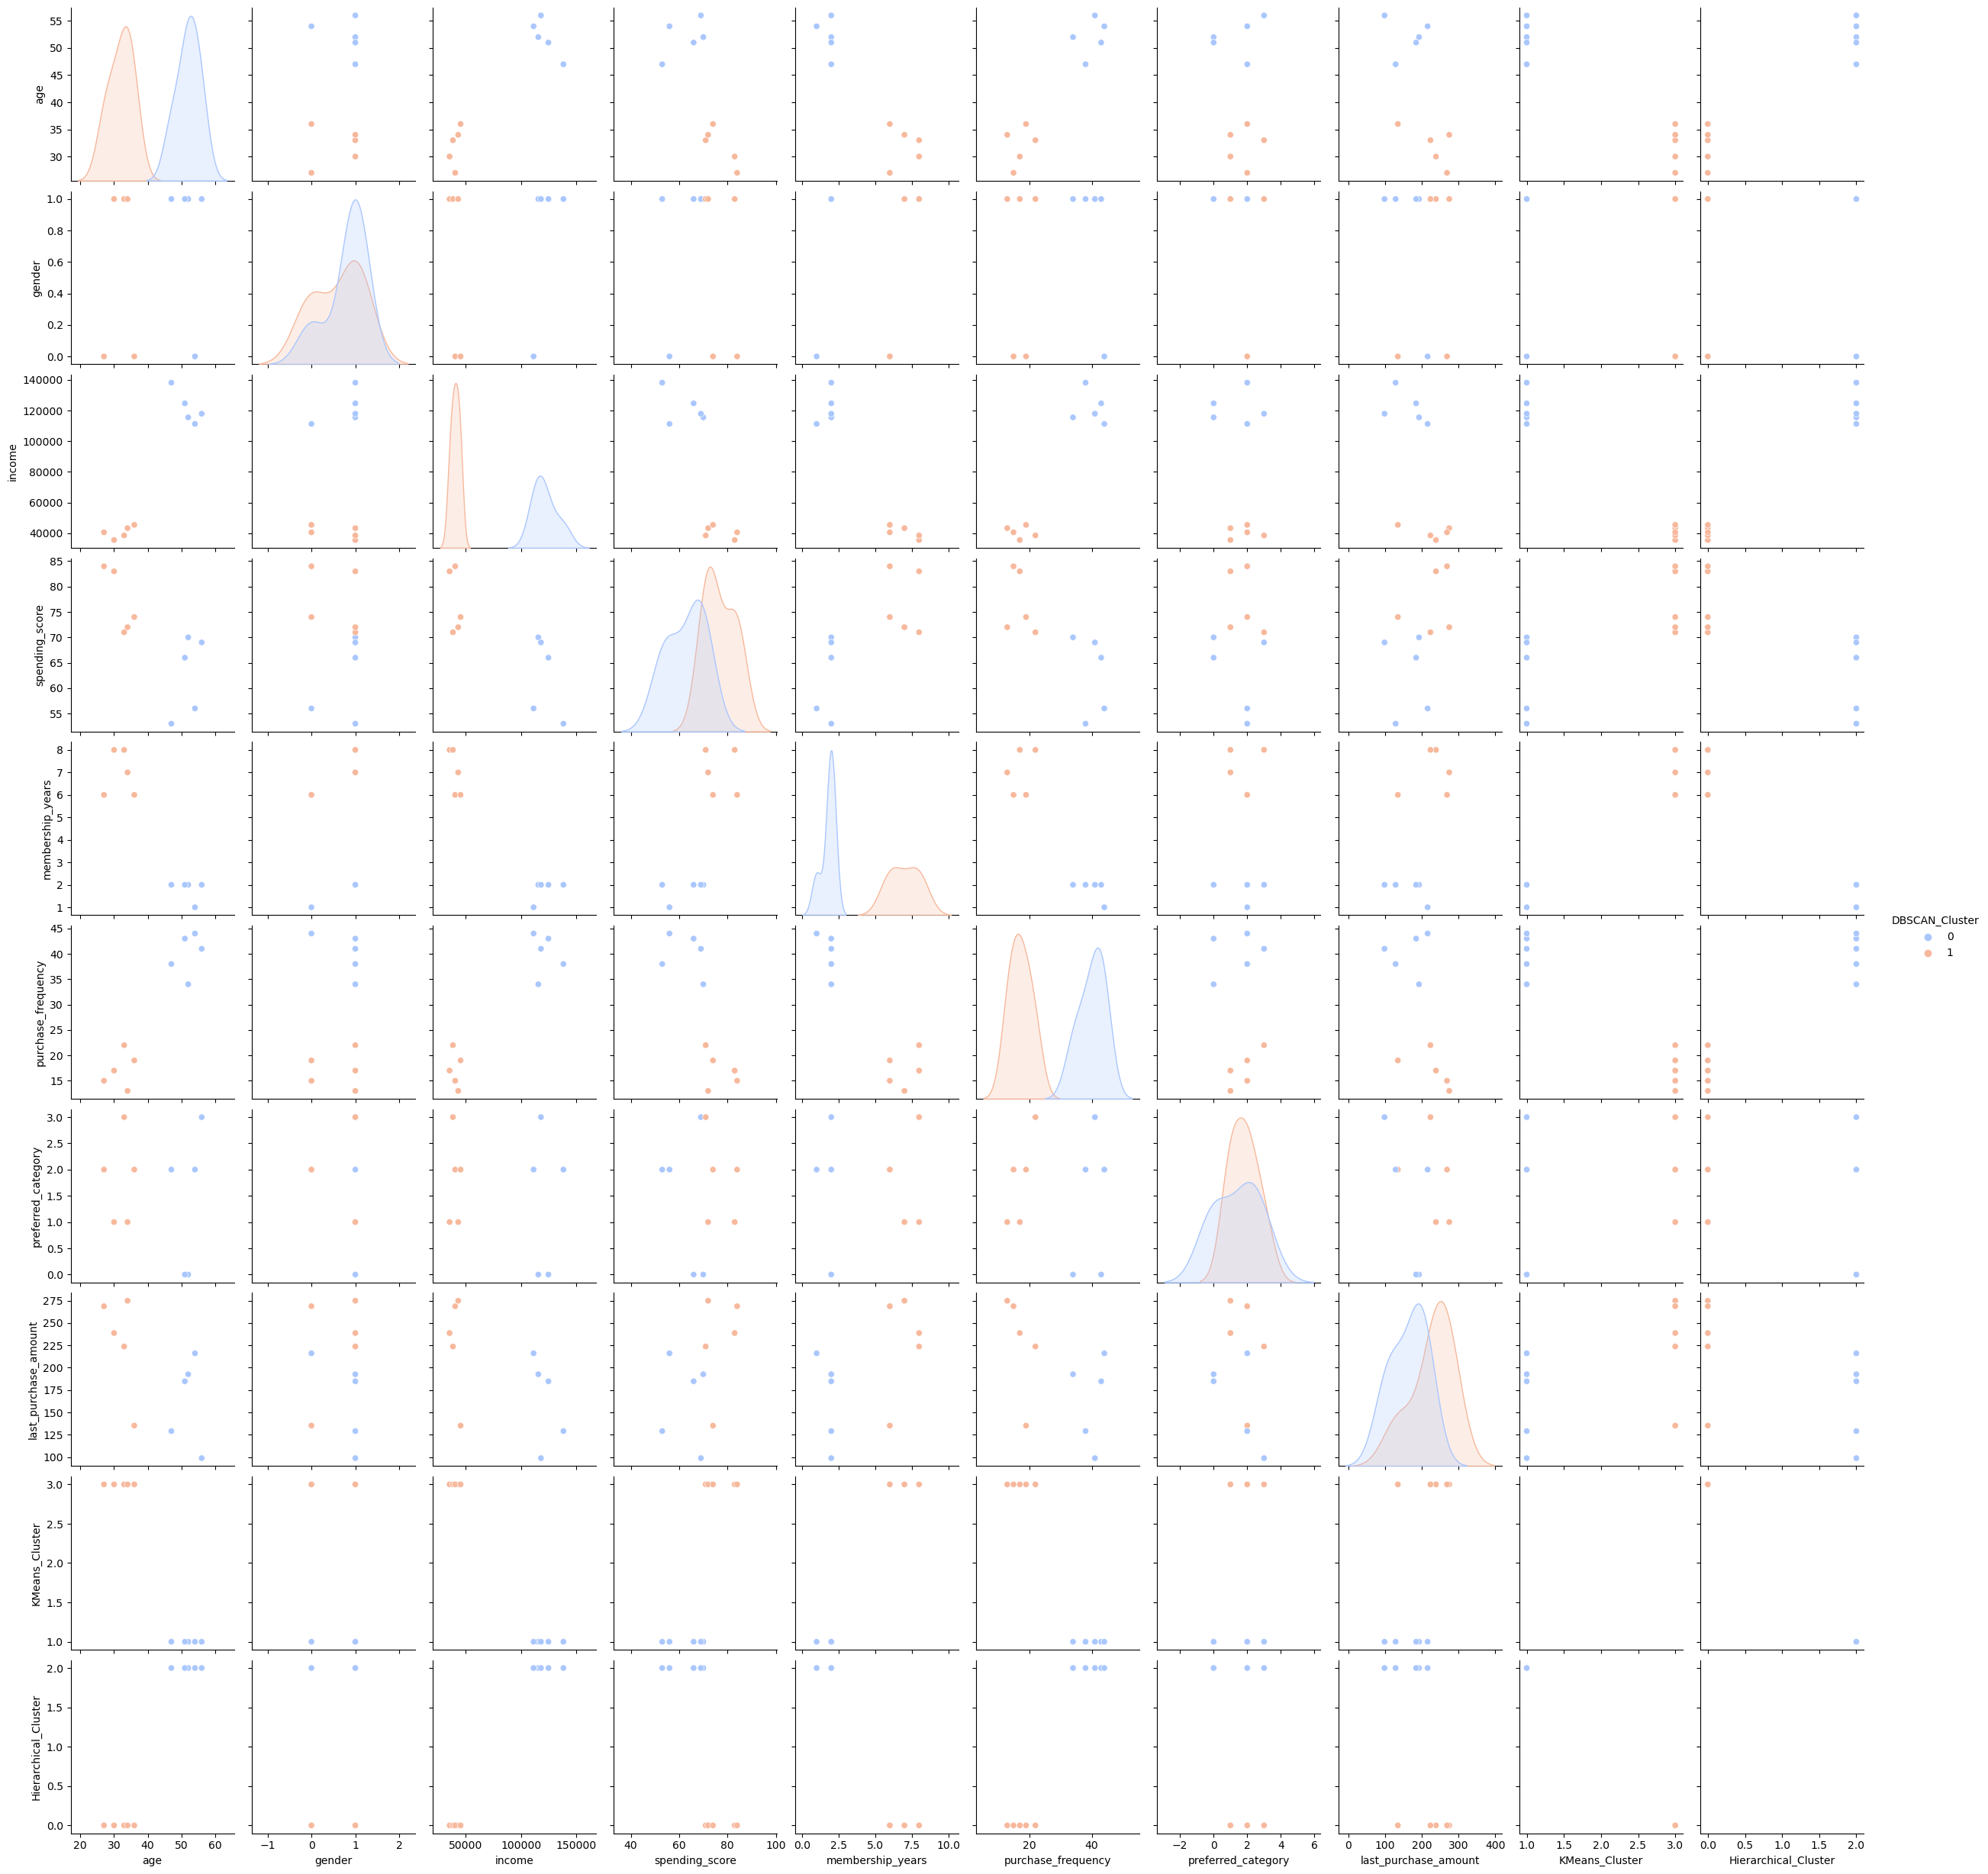

In [14]:
import seaborn as sns

# Pairplot to visualize the relationship between different features
sns.pairplot(data, hue='KMeans_Cluster', palette='viridis')
plt.show()

# Alternatively, you can visualize the relationship with other clustering labels
sns.pairplot(data, hue='Hierarchical_Cluster', palette='plasma')
plt.show()

# DBSCAN visualizations (using clusters without noise points)
sns.pairplot(data[data['DBSCAN_Cluster'] != -1], hue='DBSCAN_Cluster', palette='coolwarm')
plt.show()


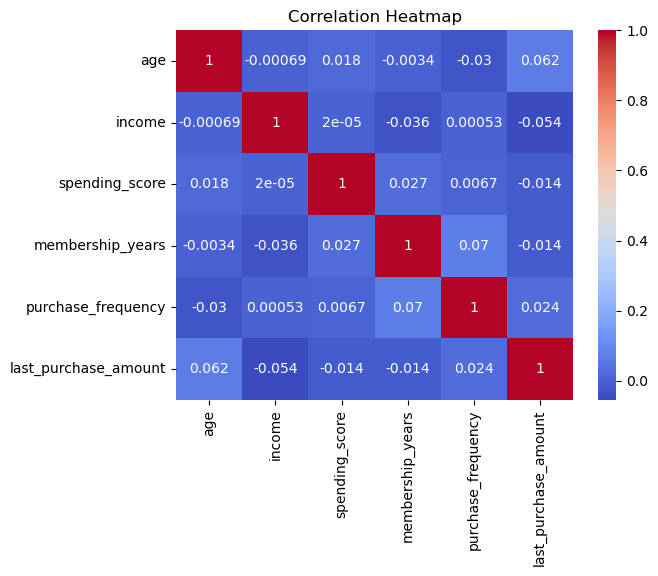

In [16]:
# Correlation Heatmap for numerical features
sns.heatmap(data[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
